In [5]:
# Slides for Probability and Statistics module, 2016-2017
# Matt Watkins, University of Lincoln

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Confidence Intervals

Learning objectives:

<div style="background-color:Gold; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 8px; padding-right: 8px; padding-top: 8px; border-radius: 25px;">

<ul>
    <li> how to estimate the expected value of the sample mean
    <ul>
        <li>if the population variance is known - normal distribution</li>
        <li> if the population variance is not known - t distribution</li>
    </ul>
    </li>
    <li> how to estimate the expected value of the sample variance</li>
    <li> understand the origin of the central limit theorem</li>
</ul>
</div>

## Statistical inference or estimation 

If we don't have all the information about a population we have to $\textbf{estimate}$ population parameters from sample statistics. This is also referred to as $\textbf{inference}$.

Last week we talked a little about sampling - what happens if we make repeated measurements from a distribution.

## Using confidence intervals

there are two situations that commonly come up. We've taken a sample and

- we want to estimate the mean, and we know the variance (this is pretty artificial really),


- we want to estimate the mean, and we don't know the variance.

### Estimating the mean when the variance is known

If we take a samples in an independent trials process of size $n$ then we saw last week that the expectation of the sample mean, $\bar{X}$, should be a good point estimator of the population mean, $\mu$.

$$\text{E}(\bar{X}) = \mu$$

The sample mean (random variable) should have a variance that is the population variance divided by the size of the sample.

$$\text{var}(\bar{X}) = \frac{\sigma^2}{n}$$

If we know nothing else then the best we could do would be to use Chebychev's inequality to provide some loose limits how accurate our estimate of the mean is.

If  $n>30$ we can additionally use the Central Limit Theorem: $\bar{X}$ should be normally distributed, with parameters $\text{E}(\bar{X}) = \mu$, and $\sigma^2/n$ the population variance divided by the sample size.


#### Central limit Theorem

Let $S_n = X_1 + X_2 + X_3 + \ldots + X_n$ be the sum of $n$ independent continuous random variables with common probability density function $f$ with expectation $\mu$ and variance $\sigma^2$. Let $S_N^* = \frac{(S_n - n \mu)}{\sigma \sqrt{n}}$. Then we have, for all $a \lt b$,

$$
\lim_{n \to \infty} P(a \lt S_n^* \lt b) = \frac{1}{\sqrt{2 \pi}} \int_a^b e^{-\frac{x^2}{2}} \text{d}x
$$

applied to our case we expect the random variable $\bar{X}$ is distributed normally with parameters $\mu,\sigma^2/n$.

$$
f_{\bar{X}}(\bar{x}) = n(\mu,\sigma^2/n) = \frac{1}{(\sigma/\sqrt{n}) \sqrt{2 \pi}} \exp\Big\{-\frac{(\bar{x} -\mu)^2}{2(\sigma^2/n)}\Big\}
$$

#### Standardise

it is sometimes easier to work with the standard normal distribution: We define a new varaible by subtracting the mean and dividing by the standard deviation

$$
z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}},
$$

where $\bar{x}$ is the value of the sample mean obtained. 

This variable should have a standard normal distribution.

$$
f_Z(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{z^2}{2}}
$$

#### Confidence limits: use quantiles to place limits on the value of $\mu$

The confidence interval is the the probability that our random sampling gives the interval that contains $\mu$. 

$$
P\Bigg(-z_c \cdot \frac{\sigma}{\sqrt{n}} \lt \bar{x} - \mu \lt z_c \cdot \frac{\sigma}{\sqrt{n}} \Bigg) = c
$$

This states that the probability is $c$ that our point estimate ($\bar{x}$) is within a distance $\pm z_c (\frac{\sigma}{\sqrt{n}})$ of the population mean $\mu$. We call this interval a $c$ confidence interval for $\mu$.


We can rearrange our interval 

$$
P\Bigg(-z_c \cdot \frac{\sigma}{\sqrt{n}} \lt \bar{x} - \mu \lt z_c \cdot \frac{\sigma}{\sqrt{n}} \Bigg) = c
$$

to give

$$
P\Bigg(-z_c \lt \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \lt z_c\Bigg) = c
$$

which gives us a $c \cdot 100 \%$ confidence limit for $\mu$. We can find it using quantiles of the standard normal distribution.

$z_c$ is the value of the $\textbf{cumulative distribution function}$ of the standard normal distribution ($N$) which contains $c$ of the probability density, so

$$
N(z_c) - N(-z_c) = c
$$

For the standard normal distribution, we can note that $N(-x) = 1 - N(x)$

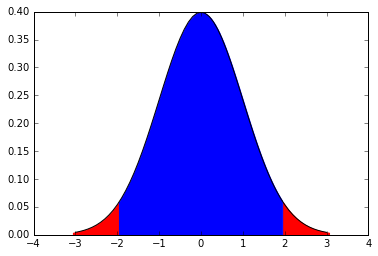

In [5]:
mu = 0 # mean 
sigma = 1 # standard deviation

# fancy code to set x limits
x = np.linspace(int(stats.norm.ppf(0.001)),
                int(stats.norm.ppf(0.999)),
                (int(stats.norm.ppf(0.999) - int(stats.norm.ppf(0.001))))*10+1)

# plot pdf
plt.plot(x, stats.norm.pdf(x,loc = mu, scale = sigma), 'k-', label='normal pdf');

# colour in the area below -zc and above zc
section = np.arange(stats.norm.ppf(0.975), stats.norm.ppf(0.999), 0.1)
plt.fill_between(section,stats.norm.pdf(section), color='r');
plt.fill_between(-section,stats.norm.pdf(section), color='r');

# colour in the area between -zc and zc
section = np.arange(stats.norm.ppf(0.025), stats.norm.ppf(0.975), 0.1)
plt.fill_between(section,stats.norm.pdf(section), color='b');

The blue area is contains has area $c$. The borders between red and blue occur at $\pm z_c$. In this particular case $c = 0.95$

Because $N(z_c) - N(-z_c) = c$ and $N(-x) = 1 - N(x)$ we can find the value of $z_c$ from the inverse of the cumulative distribution function, using tables or computer.


### Critical values

The critical values can be obtained from the  ppf (percentage point function) of the python scipy.stats library, or tables

In [11]:
for conflevel in [70,80,90,95,99]:
    ppt = 1 -(100 - conflevel)/200
    print("critical value for {}% confidence {:.3}".format(conflevel,stats.norm.ppf(ppt)))

critical value for 70% confidence 1.04
critical value for 80% confidence 1.28
critical value for 90% confidence 1.64
critical value for 95% confidence 1.96
critical value for 99% confidence 2.58


#### Random interval

Note that in classical statistics $\bar{X}$ is the random variable and $\mu$ is assumed to be well defined. 

Every time we were to take a different sample we would get a different confidence interval - however, the law of large numbers would say that in the long run the proportion of confidence intervals that contained $\mu$ would be $c$. 


#### Example 

Suppose we wish to estimate the average wait for a webpage to load. We think that the wait times are normally distributed with variance of $\sigma^2 = 4$ seconds. If we take a sample of size 9, and obtain a particular value of the sample mean as 5 seconds, what is a 95% confidence interval for the load times.

---

#### Solution  

We need the critical value for a symmetric 95% confidence interval of a standard normal distibution. We can find $z_c = 1.96$.  

```
stats.norm.ppf(0.975)
1.959963984540054
```

We use 0.975, because that means that 2.5% of the probability is above that value, there will be another 2.5% at the bottom, so 95% in the central region.

A 95 percent interval for the unknown mean based on a sample size of size $n$ is between $\bar{x} - 1.96\frac{\sigma}{\sqrt{n}}$ and $\bar{x} + 1.96\frac{\sigma}{\sqrt{n}}$.  

Or in our case

$[5 - \frac{1.96 \times 2}{3},5 + \frac{1.96 \times 2}{3}] = [3.69,6.31]$

The length of the interval is $3.92\sqrt{\frac{4}{9}} = 2.61$. 

#### Example - estimating sample size required

Suppose we wish to estimate the average wait for a webpage to load, so that we can assert with 95% confidence that the estimated value is within 0.5 seconds of the true value. 

We think that the wait times are normally distributed with variance of $\sigma^2 = 2.25$ seconds - how large a random sample is needed?

---

#### Solution  

We need the critical value for a symmetric 95% confidence interval of a standard normal distibution. We can find $z_c = 1.96$.  

A 95 percent interval for the unknown mean based on a sample size of size $n$ is between $\bar{x} - 1.96\frac{\sigma}{\sqrt{n}}$ and $\bar{x} + 1.96\frac{\sigma}{\sqrt{n}}$.  

The length of the interval is $3.92\sqrt{\frac{2.25}{n}}$. This interval should be equal to $0.5$ $\implies n = 138.298$. We cannot do a fractional number of experiments, so we should perform $n = 139$, going on the safe side.

# Estimating the mean when the variance is *not* known

If we take a samples in an independent trials process of size $n$ then we saw last week that the expectation of the sample mean, $\bar{X}$, should be a good point estimator of the population mean, $\mu$.

$$\text{E}(\bar{X}) = \mu$$


If we are interested in the sample mean (random variable) then it should have a variance that is the population variance divided by the size of the sample. 

$$\text{var}(\bar{X}) = \frac{\sigma^2}{n}$$

As we don't know the variance *a priori* we replace population variance with the sample variance - we showed that this was an unbiased estimator for the population variance last week.

$$
\text{E}[S^2] =\sigma^2
$$

But the sample variance is a random variable too. So we are now not dealing with a sum of i.i.d random variables like in the case when the variance was assumed known. Instead have something coming about from the quotient of two random variables.


We define a new random variable as

$$
\frac{\bar{x} - \mu}{\sqrt{S^2}}
$$

where $S^2$ is the sample variance

$$
S^2 = \sum_{i=1}^n \frac{ (X_i - \bar{X})^2}{n-1}
$$

Intuitively we might expect $S^2$ to be distributed a bit like the square of a normal distribution as we expect the values of $X$ to be normally distributed around the sample mean (for large samples). 

This is more or less the case (called a $\chi^2$ distribution).



### Sampling distribution of the variance - $\chi^2$ distribution

In general the distribution of the sample variance is quite complicated. 

$\textbf{If all the samples come from a normal distribution}$, then the sample statisic $\frac{n-1}{\sigma^2}S^2$ can be shown to have a $\chi^2$ distribution. 

It has a single parameter, often referred to as the number of degrees of freedom, $\nu$. The number of degrees of freedom will be $n-1$.

So

$$
\frac{n-1}{\sigma^2}S^2 \sim \chi^2(n-1)
$$


### $\chi^2$ distribution

You will mainly come across $\chi^2$ in this case and in the analysis of errors (they also have the sum of squared terms). 

Some properties of the $\chi^2$ family are

- If a random variable $Y \sim N(0,1)$ then $Y^2 \sim \chi^2(1)$
- If $X_1$ and $X_2$ are independent and distributed $\chi^2(\nu_1)$ and $\chi^2(\nu_2)$ respectively, then $X_1 + X_2 \sim \chi^2(\nu_1 + \nu_2)$
- If $X \sim \chi^2(\nu)$ then $\text{E[$X$]}= \nu$ and $\text{var}(X)= 2 \nu$

#### Technical aside

We can get an idea where the distribution arises from by considering

$$
\begin{align}
\frac{n-1}{\sigma^2}S^2 & = \frac{n-1}{\sigma^2} \sum_{i=1}^n \frac{ (X_i - \bar{X})^2}{n-1} \\
                        & = \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \bar{X})^2
\end{align}
$$

now $\sum_{i=1}^n (X_i - \bar{X})^2$ can be rewritten as 

$$
\frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \bar{X})^2 = \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2 - n \frac{1}{\sigma^2} (\bar{X} - \mu)^2
$$

or, rearranging

$$
\begin{align}
\frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2  & =  \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \bar{X})^2 + n \frac{1}{\sigma^2}(\bar{X} - \mu)^2 \\
\implies  \sum_{i=1}^{n} \Big(\frac{X_i - \mu} {\sigma} \Big)^2 &  =  \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \bar{X})^2 + n \Big( \frac{\bar{X} - \mu}{\sigma}\Big)^2
\end{align}
$$

the thing on the left hand side is the sum of the square $n$ independent random variables distributed as $N(0,1)$ - it follows that the lhs is distributed as $\chi^2(n)$. 

The last term on the right hand side is distributed $\chi^2(1)$. 

From the second property we gave of the $\chi^2$ distribution ($X_1$ and $X_2$ are independent and distributed $\chi^2(\nu_1)$ and $\chi^2(\nu_2)$ respectively, then $X_1 + X_2 \sim \chi^2(\nu_1 + \nu_2)$) we can argue that it is reasonable that $\frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \bar{X})^2$ is $\chi^2(n-1)$. 

But a full proof is quite involved.

**example**

We can check that our data on your heights fits this distribution.

In [6]:
heights = np.array([174, 179, 171, 178, 190, 
                    182, 168, 163, 168, 168, 182, 185,
                    175, 175, 183, 182, 168, 159, 154, 179,
                   180, 190, 182, 170, 180])

population_size = len(heights)
print("Population size = {},\nPopulation mean = {:.5},\nPopulation variance = {:.5}".format(
        population_size, np.mean(heights), np.var(heights)))

Population size = 25,
Population mean = 175.4,
Population variance = 79.04


In [7]:
def sample_var(sample_size):
    sample_items = []
    for i in np.random.randint(0,population_size,sample_size):
        sample_items.append(heights[i])
    return np.var(sample_items)*sample_size/(sample_size-1)

Sample var = 79.339



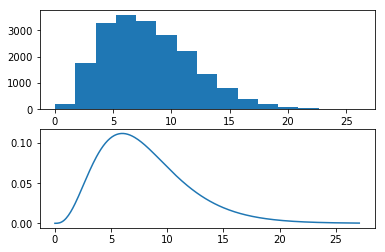

In [8]:
sample_size = 9
number_of_samples = 20000
my_sample_var = []

for my_sample in range(1,number_of_samples+1):
    my_sample_var.append(sample_var(sample_size))
        
print("Sample var = {:.5}\n".format(
        np.mean(my_sample_var)))
prefactor = (sample_size-1)/np.var(heights)
scaled = prefactor*np.array(my_sample_var)
bins = np.arange(0,stats.chi2.ppf(0.999, sample_size -1)+1, stats.chi2.ppf(0.999, sample_size -1)/15)

fig, ax = plt.subplots(2, 1)
ax[0].hist(scaled,bins=bins);
x = np.arange(0,stats.chi2.ppf(0.999, sample_size -1)+1,0.1)
ax[1].plot(x, stats.chi2.pdf(x, sample_size-1), '-', ms=4, label='t, n-1 = 3');

## t distribution

The random variable that is the quotient of the random variable $\bar{X}$, which is approximately normally distributed and the random variable $S^2$ has a distribution from a family referred to as Student's t Distribution.  

$$
\frac{\bar{x} - \mu}{\sqrt{S^2}} \sim \text{Student's t distribution with parameter }\nu = n-1 
$$

the t distribution looks a lot like a normal distribution:

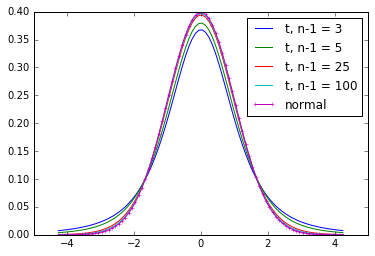

In [15]:
fig, ax = plt.subplots(1, 1)

x = np.arange(stats.t.ppf(0.001, 50)-1,stats.t.ppf(0.999, 50)+1,0.1)

ax.plot(x, stats.t.pdf(x, 3), '-', ms=4, label='t, n-1 = 3');
ax.plot(x, stats.t.pdf(x, 5), '-', ms=4, label='t, n-1 = 5');
ax.plot(x, stats.t.pdf(x, 20), '-', ms=4, label='t, n-1 = 25');
ax.plot(x, stats.t.pdf(x, 50), '-', ms=4, label='t, n-1 = 100');
ax.plot(x, stats.norm.pdf(x), '-+', ms=4, label='normal');

ax.legend();

it is symmetric about the y-axis, bell shaped, but a bit squished. When the parameter (Degrees of Freedom it is often called) is  greater than about 8 it is hard to tell the t-distribution from the normal distribution.

If we want to establish confidence intervals for the mean when the variance is unknown we use the same logic as for the case with known variance, but we use the t distributions instead.

$$
P\Bigg(-t_c(\nu) \frac{\sigma}{\sqrt{n}} \lt \bar{x} - \mu \lt t_c(\nu) \frac{\sigma}{\sqrt{n}} \Bigg) = c
$$

#### Example

We have a sample of size 10 from a distribution that we think is at least normal to a reasonable approximation. 

If the sample mean is 10 and the sample variance 3, what is a 90% confidence interval for the population mean.